<a href="https://colab.research.google.com/github/Ksu04/SKM/blob/main/Ichetovkina_PR1_(version_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 29. Нелинейный метод наименьших квадратов

Задание: 

[Ratkowsky D. A. Nonlinear Regression Modeling. 1983]

Нелинейным методом наименьших квадратов
построить модели вида
$$
y = \frac{\beta_1}{1 + \beta_2 e^{-\beta_3 t}},
\qquad
\mbox{и}
\qquad
y = \frac{\beta_1}{(1 + \beta_2 e^{-\beta_3 t})^{1/\beta_4}},
$$
для данных, приведенных в таблице
```
    t         y    
  ----------------   
    1       16.08    
    2       33.83  
    3       65.80  
    4       97.20  
    5      191.55  
    6      326.20  
    7      386.87  
    8      520.53  
    9      590.03  
   10      651.92  
   11      724.93  
   12      699.56  
   13      689.96  
   14      637.56  
   15      717.41             
```
Предиктор $t$ – время, 
переменная отклика $y$ – вес сухой луковицы вместе с надземной частью растения.
Найти общую ошибку в каждом из этих случаев и сравнить результаты.

**Немного о методе наименьших линейных квадратов**

Для точек с координатами 

$$
(x_1, y_1), ... (x_m, y_m)
$$ 

ищем функцию 

$$
y_i ≈ {\beta_0} + {\beta_1}x_i     (i = 1, 2, ..., m),
$$

в которой остаточная сумма квадратов ${\beta_0}$, ${\beta_1}$ минимальна, т.е.

$$
R({\beta_0}, {\beta_1}) = \sum\limits_{i=1}^{m}(y_i-{\beta_0} - {\beta_1}x_i)^2 → min.
$$

In [9]:
# Необходимые библиотеки
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

Апроксимирующие функции

Пусть ${\beta_1}$ = `b1`; ${\beta_2}$ =` b2`; ${\beta_3}$ = `b3`; ${\beta_4}$ = `b4`; $t$ = `t`.

In [22]:
def f1(t,b1, b2, b3):
  return (b1/(1+b2*np.exp(-1*b3*t)))

def f2(t,b1,b2,b3,b4):
  return (b1/((1+b2*np.exp(-1*b3*t))**(1/b4)))

Начальные значения

In [23]:
t = np.arange(1,16,1)
y = [16.08,33.83,65.80,97.20,191.55,326.20,386.87,520.53,590.03,651.92,724.93,699.56,689.96,637.56,717.41]

Функция `curve_fit` использует МНК (метод наименьших квадратов, чтобы построенная функция максимально совпадала с исходными данными.

In [26]:
p1 = [700, 80, 0.7]
popt1, pcov1 = curve_fit(f1, t, y, p1)
print(popt1)

p2 = [700, 200, 0.7, 1.3]
popt2, pcov2 = curve_fit(f2, t, y, p2)
print(popt2)

[7.02871521e+02 8.49922843e+01 6.88565305e-01]
[699.64138243 195.79412952   0.75962512   1.27922444]


**Модель для f1**

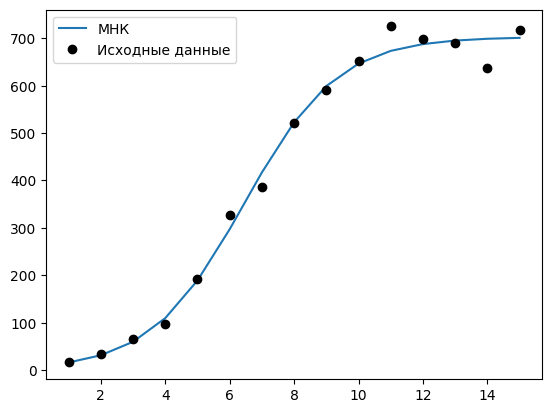

In [31]:
y1 = np.empty (15, dtype = float)
for i in range (0, 15):
  y1[i] = f1(t[i],popt1[0], popt1[1], popt1[2])
plt.plot(t, y1, label='МНК')
plt.plot(t, y, "ko",  label='Исходные данные')
plt.legend()
pass

**Модель для f2**

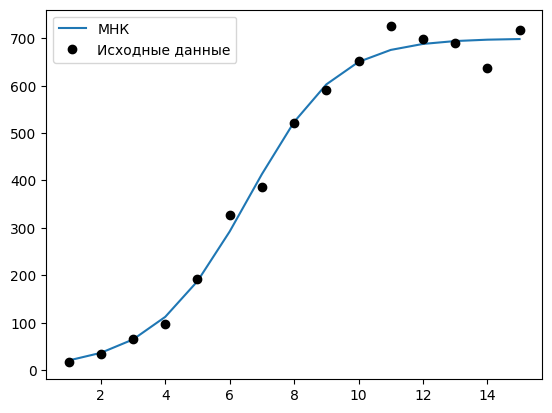

In [32]:
y2 = np.empty (15, dtype = float)
for i in range (0, 15):
  y2[i] = f2(t[i],popt2[0], popt2[1], popt2[2], popt2[3])
plt.plot(t, y2, label='МНК')
plt.plot(t, y, "ko", label='Исходные данные')
plt.legend()
pass

Общая ошибка вычисляется по формуле 

$ er = \frac{\sum\limits_{i=1}^{n}(y_i-f_i(x))^2}{n} $

In [33]:
er1 = np.array(y-y1)
for i in range(0, 15):
  er1[i] = er1[i]**2
error1 = sum(er1)/15
print("Ошибка f1: ", error1)

Ошибка f1:  595.3255315048162


In [34]:
er2 = np.array(y-y2)
for i in range(0, 15):
  er2[i] = er2[i]**2
error2 = sum(er2)/15
print("Ошибка f2: ", error2)

Ошибка f2:  585.760327353819


Вывод: ошибка в первом случае (с 3 параметрами) больше, чем во втором (с 4 параметрами)